<a href="https://colab.research.google.com/github/TusharPaul01/Water-Quality-IoT-ML/blob/main/WQ_PID43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
train_df = pd.read_csv("water_quality.csv")
train_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
train_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
train_df=train_df.drop(['Hardness','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Solids'],axis=1)

In [ ]:
# train_df=train_df.rename(columns = {'Solids':'tds'})

In [ ]:
train_df.head()

,ph,Turbidity,Potability
0,NaN,2.963135,0
1,3.716080,4.500656,0
2,8.099124,3.055934,0
3,8.316766,4.628771,0
4,9.092223,4.075075,0


<Axes: xlabel='Potability', ylabel='count'>

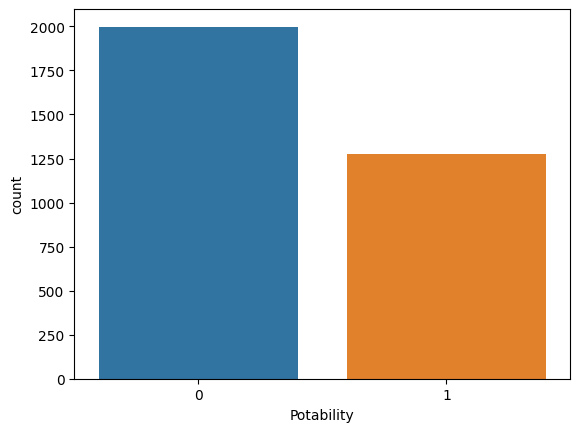

In [ ]:
 sns.countplot(x = "Potability", data = train_df)

In [ ]:
train_df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

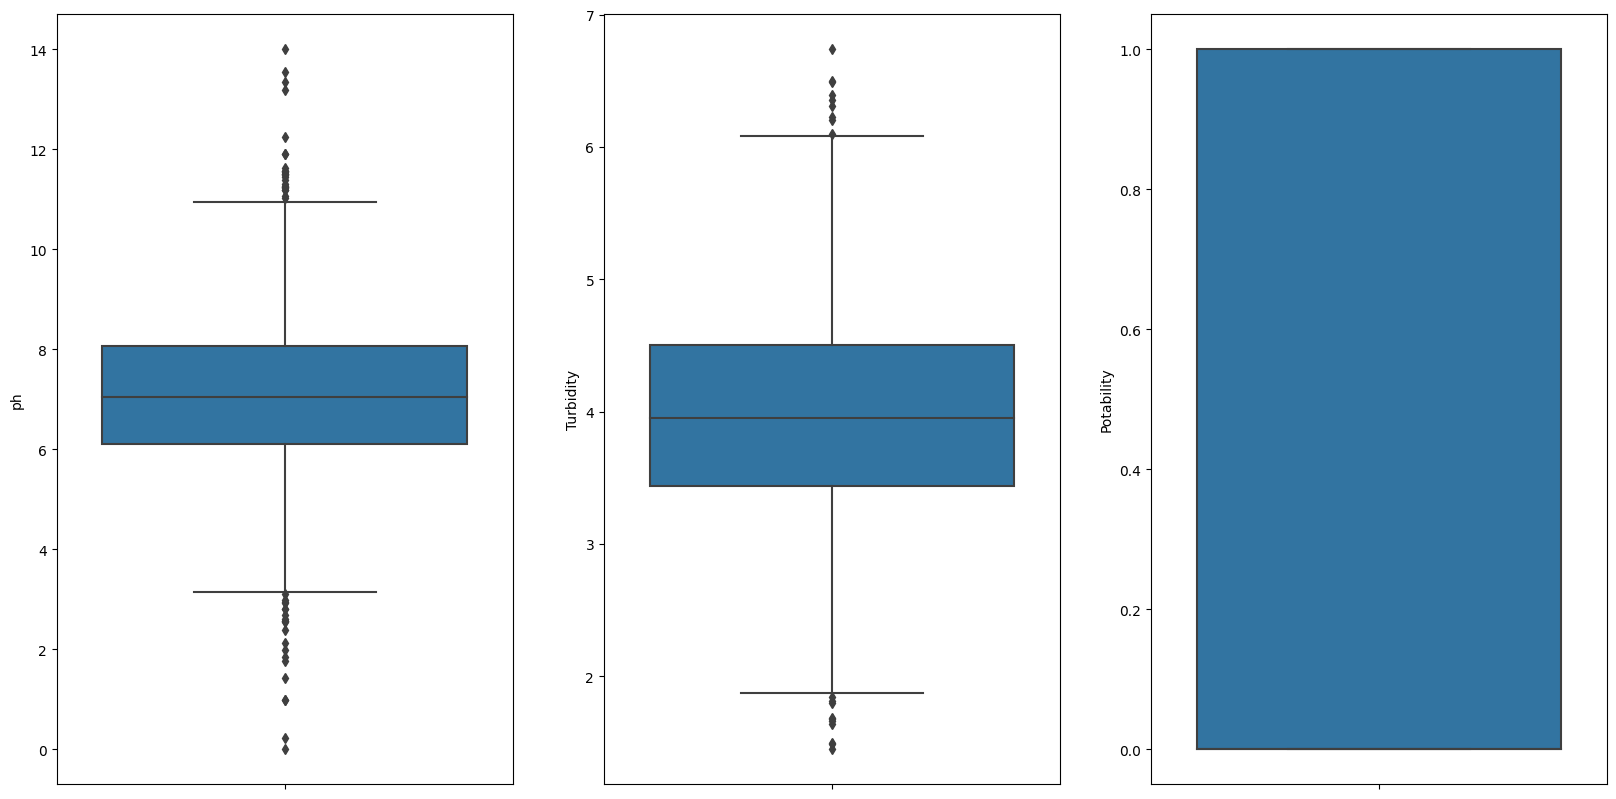

In [ ]:
fig, ax = plt.subplots(ncols = 3, nrows = 1, figsize = (20,10))
ax = ax.flatten()
index = 0;
for col, values in train_df.items():
  sns.boxplot(y = col, data = train_df, ax = ax[index])

  index += 1

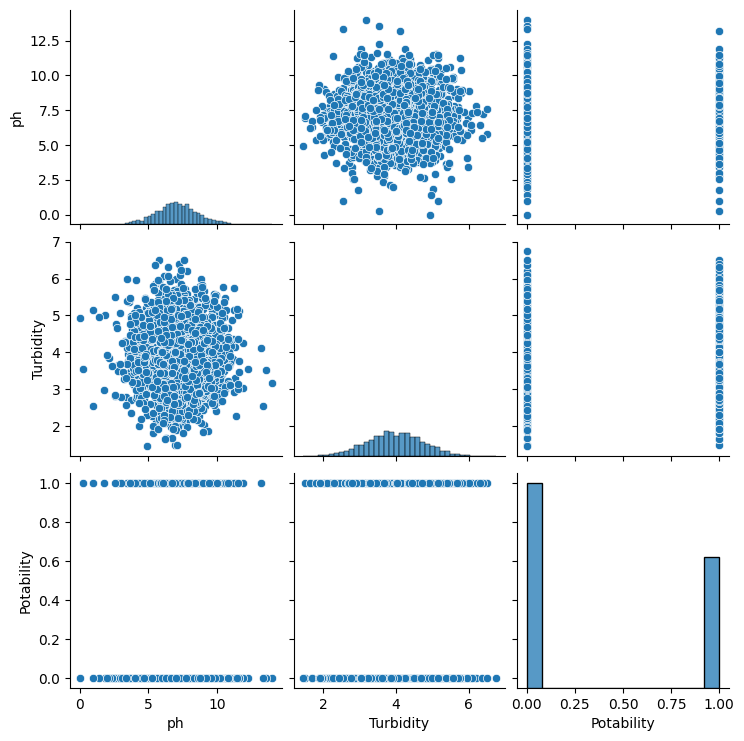

In [ ]:
sns.pairplot(train_df)

In [ ]:
import plotly.express as px
fig = px.pie(train_df,names = "Potability", hole = 0.4 ,template = "plotly_dark")
fig.show()

Text(0, 0.5, 'Percentage of missing values')

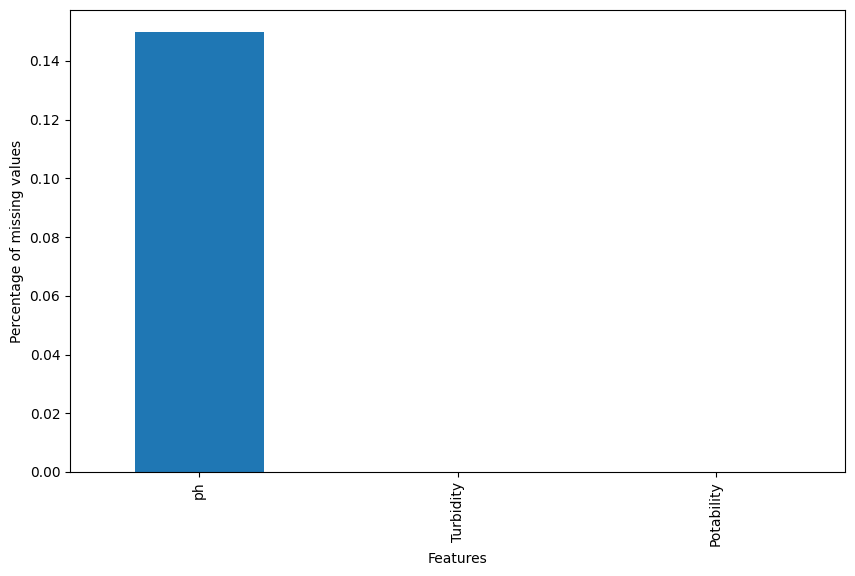

In [ ]:
train_df.isnull().mean().plot.bar(figsize= (10,6))
plt.xlabel("Features")
plt.ylabel("Percentage of missing values")

In [ ]:
train_df["ph"]= train_df["ph"].fillna(train_df["ph"].mean())
# train_df["Sulfate"]= train_df["Sulfate"].fillna(train_df["Sulfate"].mean())
# train_df["Trihalomethanes"]= train_df["Trihalomethanes"].fillna(train_df["Trihalomethanes"].mean())

In [ ]:
train_df.isnull().sum()

ph            0
Turbidity     0
Potability    0
dtype: int64

In [ ]:
train_df.shape

(3276, 3)

In [ ]:
print(train_df.dtypes)

ph            float64
Turbidity     float64
Potability      int64
dtype: object


In [ ]:
x = train_df.drop("Potability", axis =1)
y = train_df["Potability"]

In [ ]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(x_train, y_train)


SVC()

In [ ]:
rf_preds = rf_model.predict_proba(x_test)
svm_preds = svm_model.decision_function(x_test)

In [ ]:
import xgboost as xgb
import numpy as np
xgb_model = xgb.XGBClassifier()
xgb_model.fit(np.column_stack((rf_preds[:, 1], svm_preds)), y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(np.column_stack((rf_model.predict_proba(x_test)[:, 1], svm_model.decision_function(x_test))))

In [ ]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9513    0.9687    0.9599       383
           1     0.9549    0.9304    0.9425       273

    accuracy                         0.9527       656
   macro avg     0.9531    0.9495    0.9512       656
weighted avg     0.9528    0.9527    0.9527       656



In [ ]:
from sklearn.metrics import classification_report

cm=classification_report(y_test, y_pred,zero_division=0,output_dict=True)

In [ ]:
cm

{'0': {'precision': 0.9512820512820512,
  'recall': 0.9686684073107049,
  'f1-score': 0.9598965071151357,
  'support': 383},
 '1': {'precision': 0.9548872180451128,
  'recall': 0.9304029304029304,
  'f1-score': 0.9424860853432283,
  'support': 273},
 'accuracy': 0.9527439024390244,
 'macro avg': {'precision': 0.953084634663582,
  'recall': 0.9495356688568177,
  'f1-score': 0.951191296229182,
  'support': 656},
 'weighted avg': {'precision': 0.9527823722063131,
  'recall': 0.9527439024390244,
  'f1-score': 0.9526510114692047,
  'support': 656}}

<Axes: >

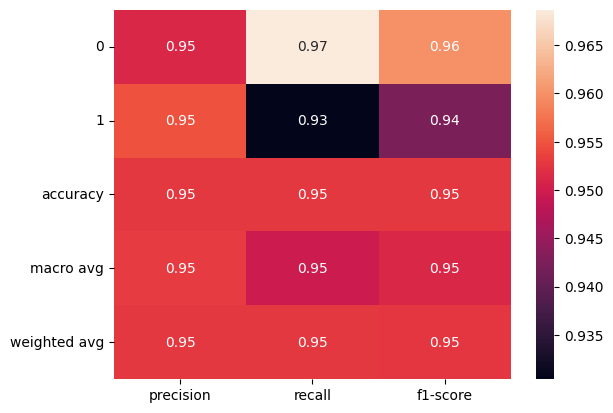

In [ ]:
import seaborn as sns
sns.heatmap(pd.DataFrame(cm).iloc[:-1, :].T, annot=True)

In [ ]:
sol=pd.DataFrame(y_pred,columns=['Potability'])
sol.head(10)

,Potability
0,1
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


In [ ]:
import pickle

# Assume that you have trained a model and saved it to a variable called `model`

# Save the model to a file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)


In [ ]:
test_df = pd.read_csv('https://thingspeak.com/channels/2029314/feed.csv')
# import pandas as pd

# file_path = 'water_quality.csv'
# test_df = pd.read_csv(file_path)

# now you can use test_df as a dataframe


In [ ]:
test_df.head(500)

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-04-21 19:56:20 UTC,1390,3000.0,1.55,0.0,0.0,-127.0,-196.6,NaN,NaN
1,2023-04-21 19:56:38 UTC,1391,3000.0,1.55,0.0,0.0,-127.0,-196.6,NaN,NaN
2,2023-04-21 19:56:56 UTC,1392,3000.0,1.55,0.0,0.0,-127.0,-196.6,NaN,NaN
3,2023-04-21 19:57:14 UTC,1393,3000.0,1.55,0.0,0.0,-127.0,-196.6,NaN,NaN
4,2023-04-21 19:57:32 UTC,1394,3000.0,1.55,0.0,0.0,-127.0,-196.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,2023-04-21 20:25:01 UTC,1485,3000.0,1.55,NaN,NaN,NaN,NaN,NaN,NaN
96,2023-04-21 20:25:19 UTC,1486,3000.0,1.55,NaN,NaN,NaN,NaN,NaN,NaN
97,2023-04-21 20:25:37 UTC,1487,3000.0,1.55,NaN,NaN,NaN,NaN,NaN,NaN
98,2023-04-21 20:25:55 UTC,1488,3000.0,1.55,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_df.drop(test_df.columns[[0,1,5,6,7,8,9]],axis=1, inplace=True)
test_df.head()

,field1,field2,field3
0,3000.0,1.55,0.0
1,3000.0,1.55,0.0
2,3000.0,1.55,0.0
3,3000.0,1.55,0.0
4,3000.0,1.55,0.0


In [ ]:
test_df.rename(columns={'field1':'Turbidity','field2':'ph','field3':'tds'},inplace=True)
test_df.head()

,Turbidity,ph,tds
0,3000.0,1.55,0.0
1,3000.0,1.55,0.0
2,3000.0,1.55,0.0
3,3000.0,1.55,0.0
4,3000.0,1.55,0.0


In [ ]:
test_df=test_df[['ph','tds','Turbidity']]
test_df.head()

,ph,tds,Turbidity
0,1.55,0.0,3000.0
1,1.55,0.0,3000.0
2,1.55,0.0,3000.0
3,1.55,0.0,3000.0
4,1.55,0.0,3000.0


In [ ]:
test_df=test_df.drop(['tds'],axis=1)

In [ ]:
test_df.head()

,ph,Turbidity
0,1.55,3000.0
1,1.55,3000.0
2,1.55,3000.0
3,1.55,3000.0
4,1.55,3000.0


In [ ]:
print(test_df.shape)

(100, 2)


In [ ]:
print(test_df.dtypes)

ph           float64
Turbidity    float64
dtype: object


In [ ]:
import pickle

with open('trained_model.pkl', 'rb') as f:
    model = pickle.load(f)



In [ ]:
predictions = model.predict_proba(test_df)
predictions

array([[0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.26122326, 0.73877674],
       [0.

In [ ]:
predictions = np.where(predictions[:, 1] >= 0.5, 1, 0)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
potability=pd.DataFrame(predictions,columns=['Potability'])
potability.head(10)

In [ ]:
if(potability.iloc[0].max()==1):
  print("Fit for drinking")
else:
  print("Unfit for drinking")

Fit for drinking
